# RNN  AirCompany Dataset com Tensorflow 2.0 
# Serie Temporal - Regressão

In [7]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas
import math

from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [8]:
tf.__version__

'2.0.0-beta1'

## Importar os dados

In [9]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

## Normalizar os dados

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Dividir os dados em teste e treino

In [11]:
# Não se pode utilizar o tf.shuffle para baralhar os dados porque numaSerie Temporal os dados têm de estar ordenados
#Split data into train and test in the ration of 80/20
 
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("train_data_size: "+str(len(train)), " test_data_size: "+str(len(test)))


train_data_size: 112  test_data_size: 29


In [12]:
# converter os dados de array para matriz
def create_dataset(dataset, steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-steps-1):
        a = dataset[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + steps, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t and Y=t+1
steps = 1
trainX, trainY = create_dataset(train, steps)
testX, testY = create_dataset(test, steps)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Modelo RNN

In [14]:
# The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons and an output layer that makes
# a single value prediction. The default sigmoid activation function is used for the LSTM blocks. 
# The network is trained for 100 epochs and a batch size of 1 is used.

model = models.Sequential()
model.add(layers.LSTM(4, input_shape=(1, 1),return_sequences=True))
model.add(layers.Dense(units=1))

## Compilar e Ajustar o Modelo

In [15]:
# Como é um problema de regressão utiliza-se o mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')


In [16]:
# batch_size para time-series é 1
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

W0619 14:10:12.622929  3356 training.py:617] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 110 samples
Epoch 1/100
110/110 - 1s - loss: 0.0613
Epoch 2/100
110/110 - 0s - loss: 0.0288
Epoch 3/100
110/110 - 0s - loss: 0.0208
Epoch 4/100
110/110 - 0s - loss: 0.0182
Epoch 5/100
110/110 - 0s - loss: 0.0166
Epoch 6/100
110/110 - 0s - loss: 0.0150
Epoch 7/100
110/110 - 0s - loss: 0.0134
Epoch 8/100
110/110 - 0s - loss: 0.0121
Epoch 9/100
110/110 - 0s - loss: 0.0106
Epoch 10/100
110/110 - 0s - loss: 0.0092
Epoch 11/100
110/110 - 0s - loss: 0.0081
Epoch 12/100
110/110 - 0s - loss: 0.0069
Epoch 13/100
110/110 - 0s - loss: 0.0059
Epoch 14/100
110/110 - 0s - loss: 0.0051
Epoch 15/100
110/110 - 0s - loss: 0.0044
Epoch 16/100
110/110 - 0s - loss: 0.0039
Epoch 17/100
110/110 - 0s - loss: 0.0035
Epoch 18/100
110/110 - 0s - loss: 0.0032
Epoch 19/100
110/110 - 0s - loss: 0.0030
Epoch 20/100
110/110 - 0s - loss: 0.0028
Epoch 21/100
110/110 - 0s - loss: 0.0027
Epoch 22/100
110/110 - 0s - loss: 0.0027
Epoch 23/100
110/110 - 0s - loss: 0.0026
Epoch 24/100
110/110 - 0s - loss: 0.0026
Epoc

# Previsões com o Modelo

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
# invert predictions
# Como os resultados estão normalizados é necessário colocar no formato original para poderem ser visualizados/interpretados
trainPredict = scaler.inverse_transform(tf.reshape(trainPredict,[110,1]))
trainY = scaler.inverse_transform(tf.reshape(trainY,[110,1]))
testPredict = scaler.inverse_transform(tf.reshape(testPredict,[27,1]))
testY = scaler.inverse_transform(tf.reshape(testY,[27,1]))

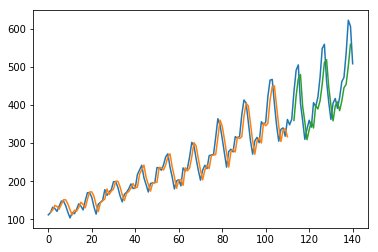

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[steps:len(trainPredict)+steps, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(steps*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()